In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import os

# Deklarasi folder data

In [2]:
# base_dir = r'D:\Kerja\Data Python\Batu-Gunting-Kertas\Train'
base_dir = r'Batu-Gunting-Kertas\Train'

os.listdir(base_dir)

['paper', 'rock', 'scissors']

In [3]:
# base_dir_test = r'D:\Kerja\Data Python\Batu-Gunting-Kertas\Test'
base_dir_test = r'Batu-Gunting-Kertas\Test'

os.listdir(base_dir_test)

['paper', 'rock', 'scissors']

# Call Image Data Generator

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

# Split Dataset to Train Data

In [5]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        subset="training")

Found 1314 images belonging to 3 classes.


# Split Dataset to Val Data

In [6]:
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150), 
        batch_size=32,
        shuffle=True,
        subset="validation")

Found 874 images belonging to 3 classes.


# Split Dataset to Test Data

In [7]:
test_generator = train_datagen.flow_from_directory(
        base_dir_test, 
        target_size=(150, 150), 
        batch_size=32,
        shuffle=True)

Found 2188 images belonging to 3 classes.


# Calls the function model to be used

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.BatchNormalization(),    
    
    tf.keras.layers.Dense(3, activation='softmax')
    # tf.keras.layers.Dense(2, activation='sigmoid')    
])

# Call EarlyStopping

In [9]:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10,verbose=2, mode='auto')

# Call optimizer for model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Train the data 

using train_generator and validation_generator with callbacks = early_stops

In [11]:
%%time
fit = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      callbacks=[early_stop]
)

Epoch 1/100
42/42 [==============================] - 74s 2s/step - loss: 1.0952 - accuracy: 0.4277 - val_loss: 1.0599 - val_accuracy: 0.3970
Epoch 2/100
42/42 [==============================] - 21s 492ms/step - loss: 0.8243 - accuracy: 0.6332 - val_loss: 0.7304 - val_accuracy: 0.6842
Epoch 3/100
42/42 [==============================] - 21s 508ms/step - loss: 0.6980 - accuracy: 0.6986 - val_loss: 0.6847 - val_accuracy: 0.7586
Epoch 4/100
42/42 [==============================] - 22s 518ms/step - loss: 0.6048 - accuracy: 0.7542 - val_loss: 0.5036 - val_accuracy: 0.8101
Epoch 5/100
42/42 [==============================] - 22s 515ms/step - loss: 0.4607 - accuracy: 0.8189 - val_loss: 0.4146 - val_accuracy: 0.8284
Epoch 6/100
42/42 [==============================] - 22s 516ms/step - loss: 0.3512 - accuracy: 0.8607 - val_loss: 0.3246 - val_accuracy: 0.8890
Epoch 7/100
42/42 [==============================] - 22s 515ms/step - loss: 0.3121 - accuracy: 0.8927 - val_loss: 0.3136 - val_accuracy: 0.

# Evaluate

In [12]:
train_loss, train_acc = model.evaluate(train_generator, steps=16)
validation_loss, val_acc = model.evaluate(validation_generator, steps=16)
test_loss, test_acc = model.evaluate(test_generator, steps=16)

print('\nTrain: %.3f, val: %.3f, test: %.3f,' % (train_acc, val_acc, test_acc))

16/16 [==============================] - 16s 1s/step - loss: 0.1012 - accuracy: 0.9570

Train: 0.980, val: 0.939, test: 0.957,


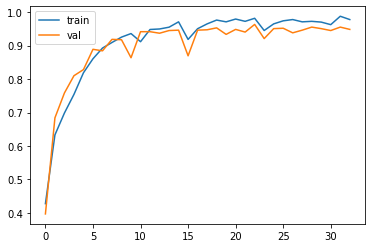

In [13]:
plt.plot(fit.history['accuracy'], label='train')
plt.plot(fit.history['val_accuracy'], label='val')
plt.legend()
plt.show()

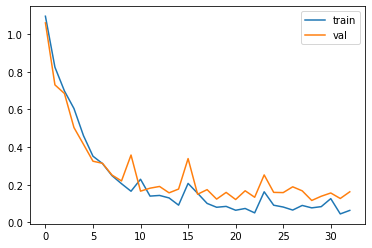

In [14]:
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], label='val')
plt.legend()
plt.show()

# Save model

In [15]:
filename = 'model.h5'
model.save(filename)